# MNIST Double Layer CNN Classification

注意：このノートブックはGPUの有無に関わらずPython 3.x および　TensorFlow 2.x（ないしTensorFlow 1.x） にて、オフラインにて稼動するよう変更しています。<br>
Google Colab環境にてオンラインで実行する場合、オリジナルサイトのコードを使って下さい。<br>
2020/02/04: By H.Nishiyama<br>
2021/11/18 追加・変更部分のみ日本語化<br>

このノートブックはTensorFlow 2.x (ないし1.x）を使います<br>
*もし、オンラインのCloabシステムを使うなら、オリジナルサイトのコードを使うか、セルを指示通りに修正して下さい。<br>
【オリジナルサイト】https://github.com/enakai00/colab_tfbook

In [1]:
###%tensorflow_version 2.x

####[CNN-01]
Import modules and set a random seed.

In [2]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20190213)

#--- For TensorFlow 1.x, use the following line, but if you use TensorFlow2.x, you need to comment it out..
###tf.random.set_random_seed(20190213)
#--- For TensorFlow 2.x, use following line, instead of upper line.
tf.random.set_seed(20190213)

####[CNN-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

####[CNN-03]
Define a CNN model with a single convolutional filter layer.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [4]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,), name='reshape'))
model.add(layers.Conv2D(32, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Conv2D(64, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 14, 14, 32)        0         
_________________________________________________________________
conv_filter2 (Conv2D)        (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
hidden (Dense)               (None, 1024)              3

####[CNN-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

####[CNN-05]
Train the model. It achieves the 99.4% accuracy.<br>
*Note: It takes more than 10 minutes without GPU.

In [6]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 8s 12ms/step - loss: 0.1570 - acc: 0.9511 - val_loss: 0.0414 - val_acc: 0.9874
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0449 - acc: 0.9862 - val_loss: 0.0354 - val_acc: 0.9880
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0321 - acc: 0.9900 - val_loss: 0.0272 - val_acc: 0.9911
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0246 - acc: 0.9922 - val_loss: 0.0243 - val_acc: 0.9911
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0200 - acc: 0.9935 - val_loss: 0.0283 - val_acc: 0.9904
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0147 - acc: 0.9954 - val_loss: 0.0245 - val_acc: 0.9917
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0131 - acc: 0.9957 - val_loss: 0.0224 - val_acc: 0.9927
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - 

####[CNN-06]
Plot chars for accuracy and loss values.

<AxesSubplot:>

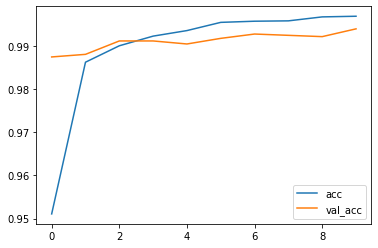

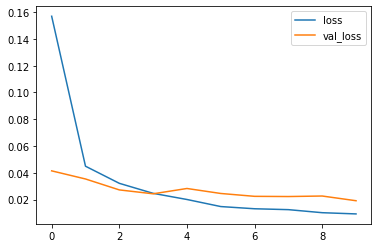

In [7]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()

####[CNN-07]
Modified to local (off-line) system.<br>
Original: Mount your Google Drive on `/content/gdrive`.<br>
Modified: Nothing.

In [8]:
###from google.colab import drive
###drive.mount('/content/gdrive')

####[MDF-08]
Modified to local (off-line) system.<br>
Original: Export the trained model as a file `MNIST_double.hd5` on your Google Drive.<br>
Modified: Export the trained model as a file `MNIST_double.hd5` on your /tmp/ directory.<br>

In [9]:
model.save('/tmp/MNIST_double.hd5', save_format='h5')
###model.save('/content/gdrive/My Drive/MNIST_double.hd5', save_format='h5')
###!ls -lh '/content/gdrive/My Drive/MNIST_double.hd5'